# Notebook to examine the 2nBB event population in the physics data

Aparajita Mazumdar, Jul 3, 2023

The skimmed files exist as .lh5 files in the path `/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/*.lh5`.

### Miscellaneous functions

In [1]:
def count_integrator(arr, bins, emin, emax):
    hist, bin_edges = np.histogram(arr, bins=bins, range=(0,bins))
    return sum(hist[emin:emax])

### Reading the data

We will use skimmed files so that it is easy to apply the quality cuts.

In [2]:
import pandas as pd # pandas
import numpy as np # numpy
import os # for listing files in the directory
import glob # Unix style pathname pattern expansion
from datetime   import datetime, timezone #for datetime functions
import matplotlib as mpl
import matplotlib.pyplot as plt # for plotting
import matplotlib.dates as mdates # for dates
import seaborn as sns # for the 2D histogram
from legendmeta import LegendMetadata
from scipy.optimize import curve_fit
import lgdo.lh5 as lh5
from lgdo.lh5 import LH5Store, show, store, load_dfs, ls # Modified

import matplotlib.pyplot as plt
import legendstyles

plt.style.use(legendstyles.LEGEND)

lmeta = LegendMetadata()

In [3]:
# Concatenation of files
def read_and_concat_data(group):
    dfs = [lh5.read_as(f"skm", file, library="pd") for file in group]
    return pd.concat(dfs, axis = 0)

In [4]:
# Define the path to the skimmed files
path_to_skimmed_files='/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/*.lh5'
skimmed_files=sorted(glob.glob(path_to_skimmed_files))
print("The files processed are:")
for file in skimmed_files:
    print(file)
print("__________________________________________________________________________")
data= read_and_concat_data(skimmed_files)
print(f"The keys in the data are:\n{data.keys()}")
print("__________________________________________________________________________")
data

The files processed are:
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r000-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r001-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r002-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r003-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r004-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p03-r005-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/ref-v2.1.2/generated/tier/skm/phy/l200-p04-r000-phy-tier_skm.lh5
/global/cfs/cdirs/m2676/data/lngs/l200/public/prodenv/prod-blind/

,trigger_timestamp,coincident_muon,coincident_muon_offline,coincident_spms,coincident_spms_experimental,geds_hit_idx,geds_rawid,geds_t0,geds_energy,geds_daqenergy,...,geds_psd_lq_value,geds_psd_lq_is_bulk,geds_psd_batch5_dt_is_good,geds_psd_batch5_dt_value,geds_psd_batch5_dt_is_high_dt,geds_psd_is_good,geds_psd_is_bb_like,spms_energy_sum,spms_multiplicity,spms_geds_coincidence_classifier
0,1.678596e+09,False,False,False,False,0,1107203,48448.0,185.007828,189.814194,...,NaN,False,False,NaN,False,False,False,0.000000,0,inf
1,1.678596e+09,False,False,False,False,1,1121605,47632.0,768.944519,768.746033,...,-0.271581,True,True,687.011719,True,False,False,0.000000,0,inf
2,1.678596e+09,False,False,True,True,2,1118405,47648.0,111.276474,112.167603,...,-1.790132,True,False,NaN,False,True,True,17.346317,7,1.750084
3,1.678596e+09,False,False,True,True,3,1089601,47824.0,240.933670,240.628860,...,NaN,False,False,NaN,False,False,False,10.241254,3,2.259017
4,1.678596e+09,False,False,True,True,5,1107205,47248.0,52.737621,53.601509,...,NaN,False,False,NaN,False,False,False,134.207458,17,-11.147507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70559,1.708271e+09,False,False,True,True,901,1088001,47632.0,112.111839,111.488403,...,-6.541803,True,False,NaN,False,True,True,46.476776,12,-0.853706
70560,1.708271e+09,False,False,False,False,903,1084804,47696.0,114.918465,114.787437,...,19.722784,False,False,NaN,False,True,False,0.000000,0,inf
70561,1.708271e+09,False,False,True,True,919,1113600,47456.0,45.840813,45.722881,...,242.014435,False,False,NaN,False,True,True,26.198444,11,1.575320
70562,1.708271e+09,False,False,True,False,924,1116802,47696.0,68.287941,67.033470,...,40.743153,False,False,NaN,False,True,True,3.717750,4,5.397536


### Defining the channel map for the hardware

Defining the date time based on a time stamp towards the start of the stable data taking. Since the hardware mapping has not changed, it should be fine.

In [5]:
# Channel map
dt    = datetime(2023, 4, 22, 5, 54, 22, tzinfo=timezone.utc)
chmap = lmeta.hardware.configuration.channelmaps.on(dt)

In [6]:
# Detectors dictionary
detlist=[]
for det, val in chmap.items():
    if val.system == "geds":
        detlist.append(det)
        
channel_dict = {}

for channel_name, channel_data in chmap.items():
    try:
        channel_dict[channel_data['daq']['rawid']] = (lmeta.channelmap(dt)[channel_name].type, channel_name, lmeta.channelmap(dt)[channel_name].production['mass_in_g'], lmeta.channelmap(dt)[channel_name].location.string, lmeta.channelmap(dt)[channel_name].location.position)
    except:
        #print(channel_name)
        continue

In [7]:
# channel and aux channel definition
channel_df = pd.DataFrame.from_dict(channel_dict, orient='index', columns=['det_type', 'channel_name', 'mass', 'string', 'position'])

### Merging the channel map and the data

In [8]:
# data is the master dataframe
data  = pd.merge(data, channel_df, left_on='geds_rawid', right_index=True, how='left')

### Data selection

The skimmed files have already removed all the information that is not needed. The events that fail quality cuts are not presented here. This is the silver dataset after multiplicity cut. Also applying the muon cut.

In [19]:
bins = np.arange(700,5300,10)
data = data[data.coincident_muon == False]

In [20]:
data_golden = data[data.geds_psd_is_good == True]

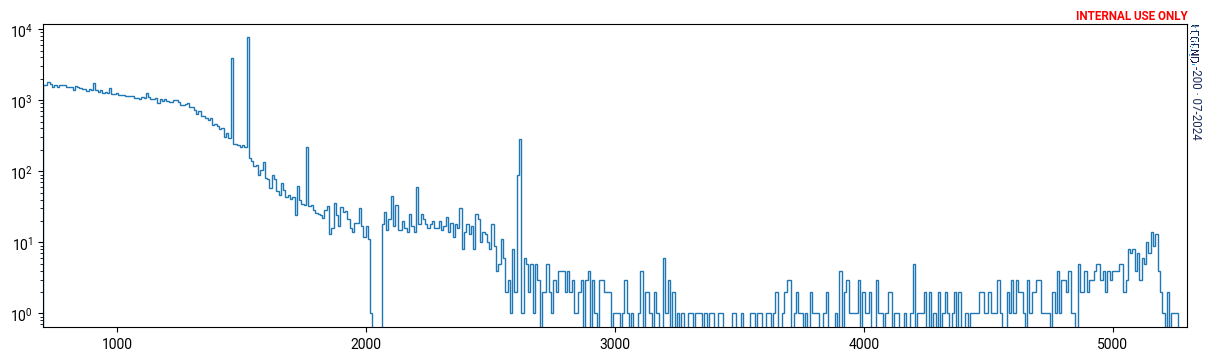

In [26]:
fig, ax = plt.subplots()
legendstyles.legend_watermark(ax, logo_suffix="-200")
counts, bins, _ = plt.hist(data_golden["geds_energy"], histtype="step", range = (700,5300), bins = bins)
plt.xlim(700,5300)
plt.yscale("log")

Apply the psd cut.

In [22]:
data_psd = data_golden[data_golden.geds_psd_is_bb_like == True]

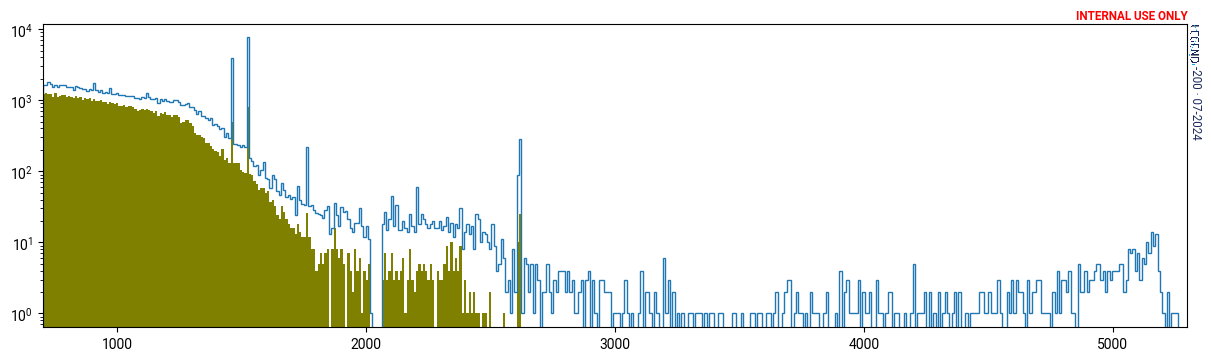

In [27]:
fig, ax = plt.subplots()
legendstyles.legend_watermark(ax, logo_suffix="-200")
counts, bins, _ = plt.hist(data_golden["geds_energy"], histtype="step", range = (700,5300), bins = bins)
counts, bins, _ = plt.hist(data_psd["geds_energy"], color = "olive", range = (700,5300), bins = bins)
plt.xlim(700,5300)
plt.yscale("log")

Thus the need for the liquid argon instrumentation.

In [24]:
data_QC = data_psd[data_psd.coincident_spms == False]

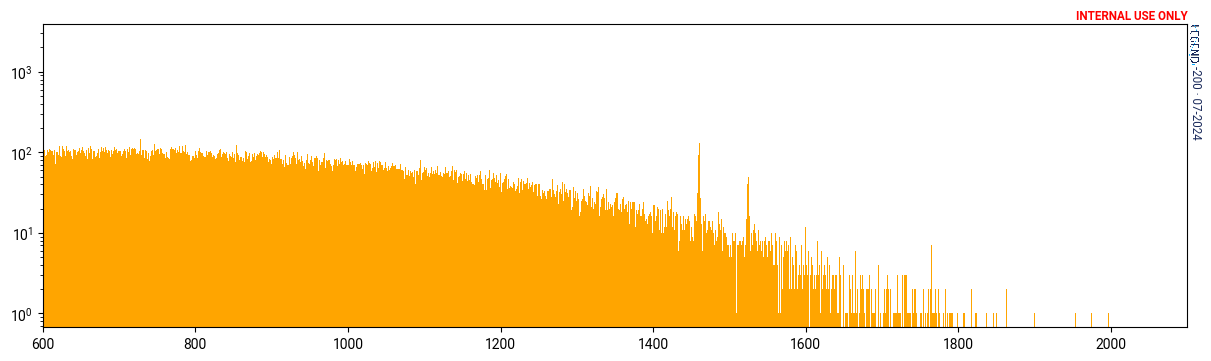

In [34]:
fig, ax = plt.subplots()
legendstyles.legend_watermark(ax, logo_suffix="-200")
counts, bins, _ = plt.hist(data_QC["geds_energy"], color = "orange", range = (0,2100), bins = 2100)
plt.xlim(600,2100)
plt.yscale("log")

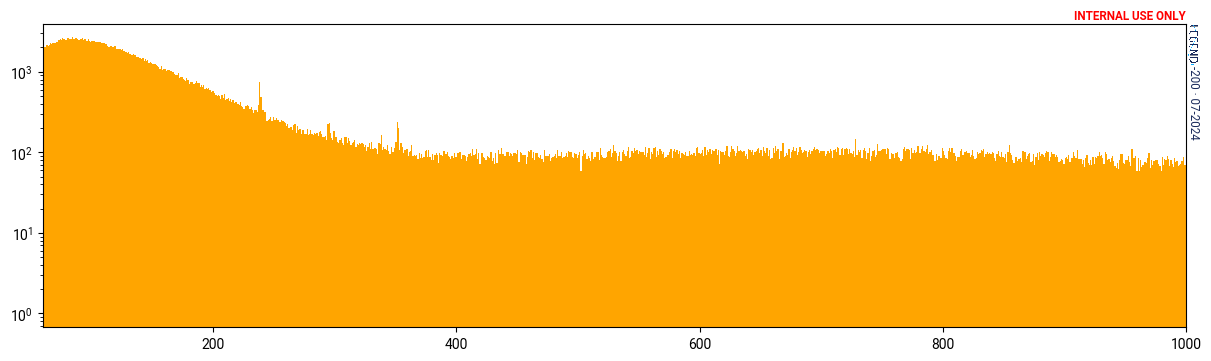

In [37]:
fig, ax = plt.subplots()
legendstyles.legend_watermark(ax, logo_suffix="-200")
counts, bins, _ = plt.hist(data_QC["geds_energy"], color = "orange", range = (0,2100), bins = 2100)
plt.xlim(60,1000)
plt.yscale("log")